In [ ]:
# 이동평균선
# 볼린저 밴드
# RSI
# MACD
# (stochastic)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.express as px

In [3]:
import FinanceDataReader as fdr

In [7]:
df = fdr.DataReader("005930",'2020','2022')

In [9]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [12]:
# 전일 주가 대비 오늘 주가 비율
df['Close']/df['Close'].shift(1) -1

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
                ...   
2021-12-24    0.007509
2021-12-27   -0.003727
2021-12-28    0.001247
2021-12-29   -0.018680
2021-12-30   -0.006345
Name: Close, Length: 496, dtype: float64

In [13]:
df['Close'].pct_change(1)

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
                ...   
2021-12-24    0.007509
2021-12-27   -0.003727
2021-12-28    0.001247
2021-12-29   -0.018680
2021-12-30   -0.006345
Name: Close, Length: 496, dtype: float64

In [14]:
df['return'] = df['Change'] + 1

In [15]:
df.head()

,Open,High,Low,Close,Volume,Change,return
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,0.989247
2020-01-03,56000,56600,54900,55500,15422255,0.005435,1.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000,1.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405,1.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921,1.017921


In [16]:
# 누적 수익률 
df['return'].cumprod()    # 누적곱

Date
2020-01-02    0.989247
2020-01-03    0.994624
2020-01-06    0.994624
2020-01-07    1.000000
2020-01-08    1.017921
                ...   
2021-12-24    1.442652
2021-12-27    1.437276
2021-12-28    1.439068
2021-12-29    1.412186
2021-12-30    1.403226
Name: return, Length: 496, dtype: float64

# 이동 평균 : moving average

판다스의 시리즈 객체는 이전의 데이터를 그룹화하는 rolling메서드를 제공합니다. 
rolling 메서드는 파라미터로 몇 개의 데이터를 그룹화할지 지정할 수 있습니다. 
rolling은 그룹화까지만 담당하며, 각 그룹에 어떤 연산을 적용할지를 뒤에 추가로 기술해야 합니다. 
다음은 종가 시리즈에 대해 3일간의 데이터를 그룹해서 그룹 간 이동평균(mean)을 rolling3 컬럼에 저장합니다.

In [52]:
df.Close

Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2022-04-21    67700
2022-04-22    67000
2022-04-25    66300
2022-04-26    66100
2022-04-27    65100
Name: Close, Length: 574, dtype: int64

In [20]:
df['5ma'] = df['Close'].rolling(5).mean()
df['20ma'] = df['Close'].rolling(20).mean()

In [21]:
df

,Open,High,Low,Close,Volume,Change,return,5ma,20ma
Date,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,0.989247,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,1.005435,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,1.000000,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,1.005405,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,1.017921,55760.0,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-24,80200,80800,80200,80500,12086380,0.007509,1.007509,79000.0,76890.0
2021-12-27,80600,80600,79800,80200,10783368,-0.003727,0.996273,79620.0,77285.0
2021-12-28,80200,80400,79700,80300,18226325,0.001247,1.001247,80060.0,77735.0


<AxesSubplot:xlabel='Date'>

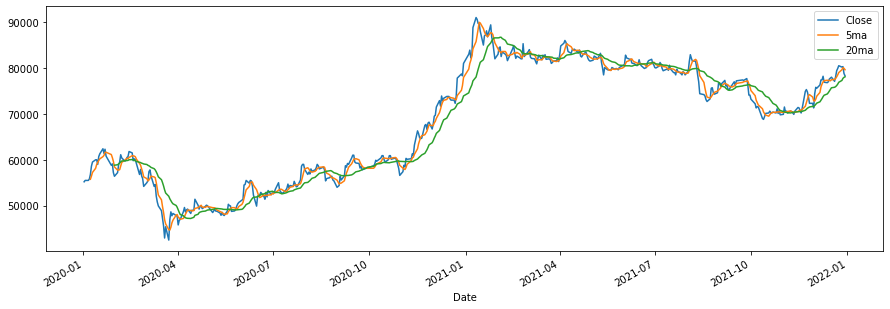

In [23]:
df[['Close','5ma','20ma']].plot(figsize=(15,5))

In [26]:
# 지수 이동평균(exponential moving average, EMA) : 현재와 가까운 값에 더 큰 가중치를 주어서 계산한 평균값

지수이동평균은 rolling 대신 시리즈의 ewm 메서드를 사용합니다. span 파라미터로 이동평균 탭 수를 넣어주고 adjust는 False로 설정합니다. adjust가 True이면 가중치를 내부적으로 보정합니다.

In [24]:
df['20ewma'] = df['Close'].ewm(span=20).mean()
df['60ewma'] = df['Close'].ewm(span=60).mean()

<AxesSubplot:xlabel='Date'>

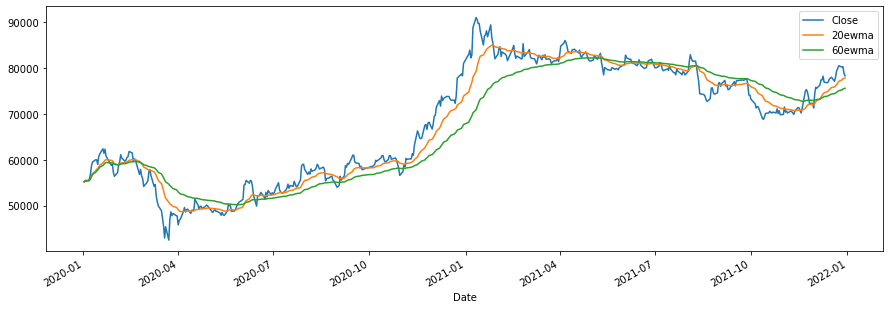

In [25]:
df[['Close','20ewma','60ewma']].plot(figsize=(15,5))

In [39]:
# 3일 간격으로 출력 
df['Close'].asfreq('3D')

Date
2020-01-02    55200.0
2020-01-05        NaN
2020-01-08    56800.0
2020-01-11        NaN
2020-01-14    60000.0
               ...   
2021-12-16    77800.0
2021-12-19        NaN
2021-12-22    79400.0
2021-12-25        NaN
2021-12-28    80300.0
Freq: 3D, Name: Close, Length: 243, dtype: float64

In [40]:
df.Close

Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2021-12-24    80500
2021-12-27    80200
2021-12-28    80300
2021-12-29    78800
2021-12-30    78300
Name: Close, Length: 496, dtype: int64

In [37]:
# 월평균
df['Close'].resample('M').mean()   # min, max도 가능

Date
2020-01-31    58815.000000
2020-02-29    59085.000000
2020-03-31    50168.181818
2020-04-30    49045.000000
2020-05-31    49100.000000
2020-06-30    52986.363636
2020-07-31    54726.086957
2020-08-31    56980.000000
2020-09-30    58176.190476
2020-10-31    59736.842105
2020-11-30    63419.047619
2020-12-31    73619.047619
2021-01-31    86565.000000
2021-02-28    83127.777778
2021-03-31    82072.727273
2021-04-30    83586.363636
2021-05-31    80521.052632
2021-06-30    81104.545455
2021-07-31    79577.272727
2021-08-31    77023.809524
2021-09-30    76305.263158
2021-10-31    70563.157895
2021-11-30    71536.363636
2021-12-31    77809.090909
Freq: M, Name: Close, dtype: float64

In [36]:
# 분기별 평균
df['Close'].resample('Q').mean()

Date
2020-03-31    55833.870968
2020-06-30    50483.606557
2020-09-30    56562.500000
2020-12-31    65783.606557
2021-03-31    83886.666667
2021-06-30    81795.238095
2021-09-30    77709.677419
2021-12-31    73433.333333
Freq: Q-DEC, Name: Close, dtype: float64

In [38]:
# 주별 평균
df['Close'].resample('W').mean()

Date
2020-01-05    55350.0
2020-01-12    57240.0
2020-01-19    60200.0
2020-01-26    61725.0
2020-02-02    57875.0
               ...   
2021-12-05    73880.0
2021-12-12    77240.0
2021-12-19    77440.0
2021-12-26    79000.0
2022-01-02    79400.0
Freq: W-SUN, Name: Close, Length: 105, dtype: float64

# bollinger band

In [41]:
df = fdr.DataReader("005930",'2020','2023')

In [42]:
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-04-21,67600,68300,67500,67700,12847448,0.004451
2022-04-22,67200,67300,66700,67000,11791478,-0.010340
2022-04-25,66500,66700,66300,66300,11016474,-0.010448
2022-04-26,66400,66700,66100,66100,12946923,-0.003017
2022-04-27,65400,65500,64900,65100,10800158,-0.015129


In [45]:
df['20ma'] = df['Close'].rolling(20).mean()

In [46]:
df.head()

,Open,High,Low,Close,Volume,Change,20ma
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN


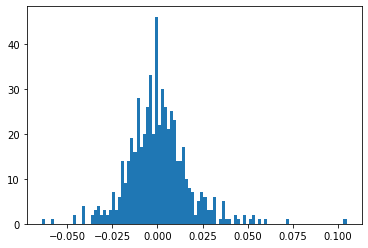

In [51]:
# 변동률 그래프
# 평균에 모여있고 좌우로 대칭을 가짐 (정규분포와 비슷한 구조)
plt.hist(df.Change, bins=100)
plt.show()

In [54]:
### 표준 편차 : 평균(mean) 에 대한 오차, 데이터들의 평균과의 차이/ 얼마나 떨어저 있는가 
### 표준정규분포 : 평균이 0이고 표준편차가 1인 좌우대칭인 정규 분포 
### 정규분포의 성질 
    1. +- 1 표준편차의 범위에 68.2%의 데이터가 존재
    2. +- 2 표준편차의 범위에 95%의 데이터가 존재 
    3. +- 3 표준편차의 범위에 99.7%의 데이터가 존재 

IndentationError: unexpected indent (Temp/ipykernel_2980/4183104152.py, line 4)

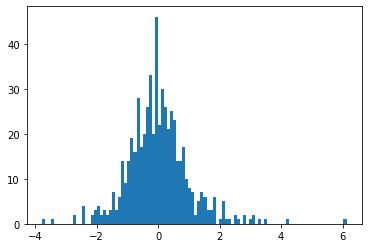

In [53]:
plt.hist((df.Change - df.Change.mean())/df.Change.std(),bins=100)
plt.show()

In [56]:
# 20일 이동 표준 편차 
df['stddev'] = df['Close'].rolling(20).std()

In [57]:
df

,Open,High,Low,Close,Volume,Change,20ma,stddev
Date,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-04-21,67600,68300,67500,67700,12847448,0.004451,68395.0,1146.837758
2022-04-22,67200,67300,66700,67000,11791478,-0.010340,68255.0,1137.159434
2022-04-25,66500,66700,66300,66300,11016474,-0.010448,68085.0,1163.603749


In [61]:
df['upper_b'] = df['20ma'] + (df['stddev']*2)    # 평균에 표준편차*2를 더한 값 
df['lower_b'] = df['20ma'] - (df['stddev']*2)

In [62]:
df

,Open,High,Low,Close,Volume,Change,20ma,stddev,upper_b,lower_b
Date,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-21,67600,68300,67500,67700,12847448,0.004451,68395.0,1146.837758,70688.675515,66101.324485
2022-04-22,67200,67300,66700,67000,11791478,-0.010340,68255.0,1137.159434,70529.318869,65980.681131
2022-04-25,66500,66700,66300,66300,11016474,-0.010448,68085.0,1163.603749,70412.207498,65757.792502


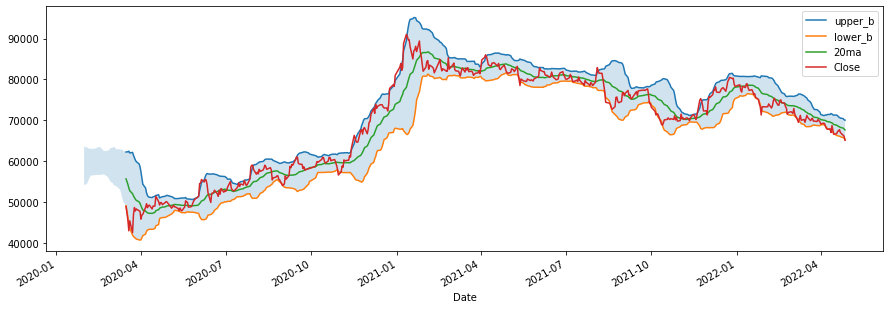

In [70]:
df[['upper_b', 'lower_b', '20ma', 'Close']][50:].plot(figsize = (15,5))
plt.fill_between(df.index, df.lower_b, df.upper_b, alpha=0.2)    # aplha : transparency

In [ ]:
# 매수 포지션 : lower_b아래에 주가가 있는 경우 

In [74]:
df['pos1'] = df['Close'] <= df['lower_b']

In [77]:
df['20ma_upper'] = df['Close'] >= df['20ma']

In [75]:
df.pos.apply(int)

Date
2020-01-02    0
2020-01-03    0
2020-01-06    0
2020-01-07    0
2020-01-08    0
             ..
2022-04-21    0
2022-04-22    0
2022-04-25    0
2022-04-26    0
2022-04-27    1
Name: pos, Length: 574, dtype: int64

In [100]:
df['pos1'] = df.pos1.apply(int)

In [ ]:
df['20ma_upper'].apply(int)

In [80]:
df.drop(['Open','High','Low','Volume','Change'], axis =1, inplace=True)

KeyError: "['Open' 'High' 'Low' 'Volume' 'Change'] not found in axis"

In [81]:
df

,Close,20ma,stddev,upper_b,lower_b,pos,pos1,20ma_upper
Date,,,,,,,,
2020-01-02,55200,NaN,NaN,NaN,NaN,False,False,False
2020-01-03,55500,NaN,NaN,NaN,NaN,False,False,False
2020-01-06,55500,NaN,NaN,NaN,NaN,False,False,False
2020-01-07,55800,NaN,NaN,NaN,NaN,False,False,False
2020-01-08,56800,NaN,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...
2022-04-21,67700,68395.0,1146.837758,70688.675515,66101.324485,False,False,False
2022-04-22,67000,68255.0,1137.159434,70529.318869,65980.681131,False,False,False
2022-04-25,66300,68085.0,1163.603749,70412.207498,65757.792502,False,False,False


In [ ]:
# 매도 포지션 : 주가가 20ma를 데드 크로스 하는 경우 

In [101]:
df.head()

,Close,20ma,stddev,upper_b,lower_b,pos,pos1,20ma_upper,sell_sig
Date,,,,,,,,,
2020-01-02,55200,NaN,NaN,NaN,NaN,False,0,False,0
2020-01-03,55500,NaN,NaN,NaN,NaN,False,0,False,0
2020-01-06,55500,NaN,NaN,NaN,NaN,False,0,False,0
2020-01-07,55800,NaN,NaN,NaN,NaN,False,0,False,0
2020-01-08,56800,NaN,NaN,NaN,NaN,False,0,False,0


In [87]:
df['sell_sig'] = (df['20ma_upper'].shift(1) == 1) & (df['Close'] < df['20ma'])
df['sell_sig'] = df['sell_sig'].apply(int)

In [89]:
df[:60]

,Close,20ma,stddev,upper_b,lower_b,pos,pos1,20ma_upper,sell_sig
Date,,,,,,,,,
2020-01-02,55200,NaN,NaN,NaN,NaN,False,False,False,0
2020-01-03,55500,NaN,NaN,NaN,NaN,False,False,False,0
2020-01-06,55500,NaN,NaN,NaN,NaN,False,False,False,0
2020-01-07,55800,NaN,NaN,NaN,NaN,False,False,False,0
2020-01-08,56800,NaN,NaN,NaN,NaN,False,False,False,0
2020-01-09,58600,NaN,NaN,NaN,NaN,False,False,False,0
2020-01-10,59500,NaN,NaN,NaN,NaN,False,False,False,0
2020-01-13,60000,NaN,NaN,NaN,NaN,False,False,False,0
2020-01-14,60000,NaN,NaN,NaN,NaN,False,False,False,0


In [102]:
buy_df = df[df['pos1'] == 1]

In [103]:
sell_df = df[df['sell_sig'] == 1]

In [104]:
buy_df

,Close,20ma,stddev,upper_b,lower_b,pos,pos1,20ma_upper,sell_sig
Date,,,,,,,,,
2020-02-28,54200,59085.0,2030.368128,63145.736257,55024.263743,True,1,False,0
2020-03-12,50800,56880.0,2980.038855,62840.077711,50919.922289,True,1,False,0
2020-03-13,49950,56287.5,3124.852628,62537.205256,50037.794744,True,1,False,0
2020-03-16,48900,55657.5,3284.704385,62226.908769,49088.091231,True,1,False,0
2020-03-17,47300,55032.5,3626.447987,62285.395973,47779.604027,True,1,False,0
2020-03-18,45600,54302.5,3983.402242,62269.304484,46335.695516,True,1,False,0
2020-03-19,42950,53450.0,4491.893283,62433.786565,44466.213435,True,1,False,0
2020-08-31,54000,56980.0,1313.332443,59606.664886,54353.335114,True,1,False,0
2020-10-30,56600,59660.0,1118.928058,61897.856117,57422.143883,True,1,False,0


In [105]:
sell_df

,Close,20ma,stddev,upper_b,lower_b,pos,pos1,20ma_upper,sell_sig
Date,,,,,,,,,
2020-02-10,59700,59785.0,1621.654451,63028.308902,56541.691098,False,0,False,1
2020-02-18,59800,59970.0,1681.509347,63333.018694,56606.981306,False,0,False,1
2020-02-21,59200,59635.0,1428.018502,62491.037004,56778.962996,False,0,False,1
2020-05-04,48500,49180.0,1054.988152,51289.976303,47070.023697,False,0,False,1
2020-05-22,48750,49140.0,803.544778,50747.089556,47532.910444,False,0,False,1
2020-06-15,49900,51880.0,2468.560203,56817.120405,46942.879595,False,0,False,1
2020-06-22,52000,52562.5,2040.567194,56643.634388,48481.365612,False,0,False,1
2020-06-25,51900,52895.0,1717.855150,56330.710300,49459.289700,False,0,False,1
2020-06-29,52400,53085.0,1590.522920,56266.045839,49903.954161,False,0,False,1


In [107]:
concat_df = pd.concat([buy_df, sell_df]).sort_index()
concat_df

,Close,20ma,stddev,upper_b,lower_b,pos,pos1,20ma_upper,sell_sig
Date,,,,,,,,,
2020-02-10,59700,59785.0,1621.654451,63028.308902,56541.691098,False,0,False,1
2020-02-18,59800,59970.0,1681.509347,63333.018694,56606.981306,False,0,False,1
2020-02-21,59200,59635.0,1428.018502,62491.037004,56778.962996,False,0,False,1
2020-02-28,54200,59085.0,2030.368128,63145.736257,55024.263743,True,1,False,0
2020-03-12,50800,56880.0,2980.038855,62840.077711,50919.922289,True,1,False,0
...,...,...,...,...,...,...,...,...,...
2022-04-07,68000,69790.0,740.483484,71270.966967,68309.033033,True,1,False,0
2022-04-08,67800,69680.0,861.210898,71402.421796,67957.578204,True,1,False,0
2022-04-12,67000,69440.0,1099.952152,71639.904304,67240.095696,True,1,False,0


In [108]:
concat_df = concat_df['2020-02-28':]
concat_df

,Close,20ma,stddev,upper_b,lower_b,pos,pos1,20ma_upper,sell_sig
Date,,,,,,,,,
2020-02-28,54200,59085.0,2030.368128,63145.736257,55024.263743,True,1,False,0
2020-03-12,50800,56880.0,2980.038855,62840.077711,50919.922289,True,1,False,0
2020-03-13,49950,56287.5,3124.852628,62537.205256,50037.794744,True,1,False,0
2020-03-16,48900,55657.5,3284.704385,62226.908769,49088.091231,True,1,False,0
2020-03-17,47300,55032.5,3626.447987,62285.395973,47779.604027,True,1,False,0
...,...,...,...,...,...,...,...,...,...
2022-04-07,68000,69790.0,740.483484,71270.966967,68309.033033,True,1,False,0
2022-04-08,67800,69680.0,861.210898,71402.421796,67957.578204,True,1,False,0
2022-04-12,67000,69440.0,1099.952152,71639.904304,67240.095696,True,1,False,0


In [109]:
buy_df = buy_df.loc['2020-02-28':]
sell_df = sell_df.loc['2020-02-28':]

In [110]:
concat_df = pd.concat([buy_df, sell_df]).sort_index()
concat_df

,Close,20ma,stddev,upper_b,lower_b,pos,pos1,20ma_upper,sell_sig
Date,,,,,,,,,
2020-02-28,54200,59085.0,2030.368128,63145.736257,55024.263743,True,1,False,0
2020-03-12,50800,56880.0,2980.038855,62840.077711,50919.922289,True,1,False,0
2020-03-13,49950,56287.5,3124.852628,62537.205256,50037.794744,True,1,False,0
2020-03-16,48900,55657.5,3284.704385,62226.908769,49088.091231,True,1,False,0
2020-03-17,47300,55032.5,3626.447987,62285.395973,47779.604027,True,1,False,0
...,...,...,...,...,...,...,...,...,...
2022-04-07,68000,69790.0,740.483484,71270.966967,68309.033033,True,1,False,0
2022-04-08,67800,69680.0,861.210898,71402.421796,67957.578204,True,1,False,0
2022-04-12,67000,69440.0,1099.952152,71639.904304,67240.095696,True,1,False,0


In [111]:
concat_df[:60]

,Close,20ma,stddev,upper_b,lower_b,pos,pos1,20ma_upper,sell_sig
Date,,,,,,,,,
2020-02-28,54200,59085.0,2030.368128,63145.736257,55024.263743,True,1,False,0
2020-03-12,50800,56880.0,2980.038855,62840.077711,50919.922289,True,1,False,0
2020-03-13,49950,56287.5,3124.852628,62537.205256,50037.794744,True,1,False,0
2020-03-16,48900,55657.5,3284.704385,62226.908769,49088.091231,True,1,False,0
2020-03-17,47300,55032.5,3626.447987,62285.395973,47779.604027,True,1,False,0
2020-03-18,45600,54302.5,3983.402242,62269.304484,46335.695516,True,1,False,0
2020-03-19,42950,53450.0,4491.893283,62433.786565,44466.213435,True,1,False,0
2020-05-04,48500,49180.0,1054.988152,51289.976303,47070.023697,False,0,False,1
2020-05-22,48750,49140.0,803.544778,50747.089556,47532.910444,False,0,False,1


# RSI(Relative Strength Index)
* 기간 14일
* 가격이 전일 보다 상승한 날의 상승분은 U
* 가격의 전일 보다 하락한 날의 하락분은 D
* U의 평균 값을 AU
* D의 평균 값을 AD

### RS = AU/AD
### RSI = AU/(AU + AD)
* 0.7 이상 -> 과열
* 0.3 이하 -> 침체 

In [112]:
df = fdr.DataReader("005930",'2020','2021')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [113]:
def UD(diff):
    ups = 0
    downs = 0
    
    if diff > 0 :
        ups = diff
    elif diff < 0 :
        downs = abs(diff)
        
    return pd.Series([ups, downs])

In [115]:
df['diff'] = df['Close'] - df['Close'].shift(1)

In [117]:
df['diff'].apply(UD)

,0,1
Date,,
2020-01-02,0.0,0.0
2020-01-03,300.0,0.0
2020-01-06,0.0,0.0
2020-01-07,300.0,0.0
2020-01-08,1000.0,0.0
...,...,...
2020-12-23,1600.0,0.0
2020-12-24,3900.0,0.0
2020-12-28,900.0,0.0


In [128]:
df

,Open,High,Low,Close,Volume,Change,diff,up,down,AU,AD,RSI,RSI_sig
Date,,,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,300.0,300.0,0.0,NaN,NaN,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,300.0,300.0,0.0,NaN,NaN,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,1000.0,1000.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130,1600.0,1600.0,0.0,564.285714,264.285714,0.681034,0.702519
2020-12-24,74100,78800,74000,77800,32502870,0.052774,3900.0,3900.0,0.0,714.285714,264.285714,0.729927,0.704224
2020-12-28,79000,80100,78200,78700,40085044,0.011568,900.0,900.0,0.0,678.571429,264.285714,0.719697,0.709359


In [123]:
df[['up','down']] = df['diff'].apply(UD)

In [124]:
df['AU'] = df['up'].rolling(14).mean()
df['AD'] = df['down'].rolling(14).mean()

In [125]:
df['RSI'] = df['AU'] / (df['AU'] + df['AD'])

In [126]:
df['RSI_sig'] = df['RSI'].rolling(6).mean()

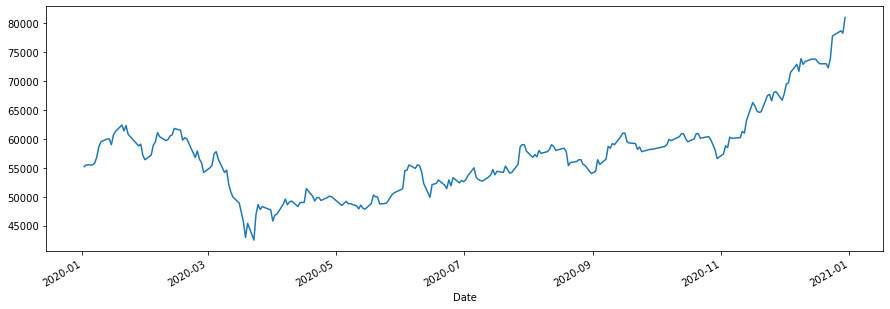

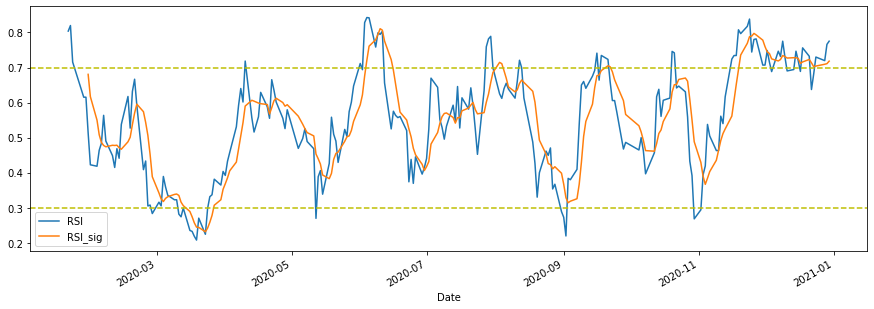

In [127]:
df['Close'].plot(figsize=(15,5))
df[['RSI','RSI_sig']].plot(figsize=(15,5))
plt.axhline(0.7, c='y', ls= '--')    #ls = line style
plt.axhline(0.3, c='y', ls= '--') 

# MACD : Moving Average Convergence Divergence
* 이동평균 수렴확산 지수
* 단기 이평 (12) - 장기 이평 (26)
* Macd signal : macd 9ma 

In [155]:
df = fdr.DataReader("005930","2020","2023")
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2022-04-21,67600,68300,67500,67700,12847448,0.004451
2022-04-22,67200,67300,66700,67000,11791478,-0.010340
2022-04-25,66500,66700,66300,66300,11016474,-0.010448


In [156]:
df ['ema_short'] = df['Close'].ewm(12).mean()
df ['ema_long'] = df['Close'].ewm(26).mean()

<AxesSubplot:xlabel='Date'>

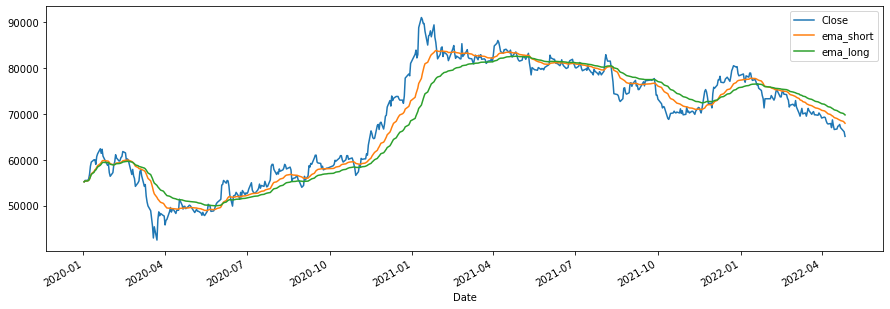

In [157]:
df[['Close','ema_short','ema_long']].plot(figsize=(15,5))

In [158]:
df

,Open,High,Low,Close,Volume,Change,ema_short,ema_long
Date,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,55200.000000,55200.000000
2020-01-03,56000,56600,54900,55500,15422255,0.005435,55356.000000,55352.830189
2020-01-06,54900,55600,54600,55500,10278951,0.000000,55407.889126,55403.749407
2020-01-07,55700,56400,55600,55800,10009778,0.005405,55517.980831,55508.488552
2020-01-08,56200,57400,55900,56800,23501171,0.017921,55816.980100,55786.646004
...,...,...,...,...,...,...,...,...
2022-04-21,67600,68300,67500,67700,12847448,0.004451,68674.773420,70375.879927
2022-04-22,67200,67300,66700,67000,11791478,-0.010340,68545.944696,70250.847337
2022-04-25,66500,66700,66300,66300,11016474,-0.010448,68373.179719,70104.519658


In [159]:
df['macd'] = df['ema_short'] - df['ema_long']
df['macd_signal'] = df['macd'].ewm(9).mean()
df['macdhist'] = df['macd'] - df['macd_signal']

<AxesSubplot:xlabel='Date'>

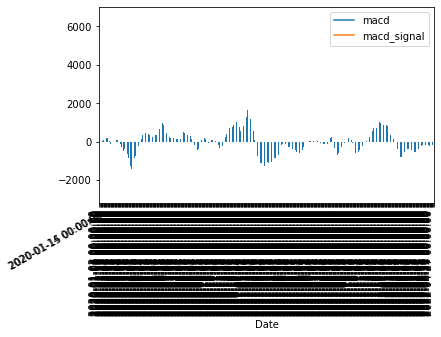

In [148]:
df[['macd','macd_signal']].plot()
df['macdhist'].plot(kind='bar')

In [149]:
df_macd = df[['macd','macd_signal','macdhist']].div(df['Close'], axis =0)

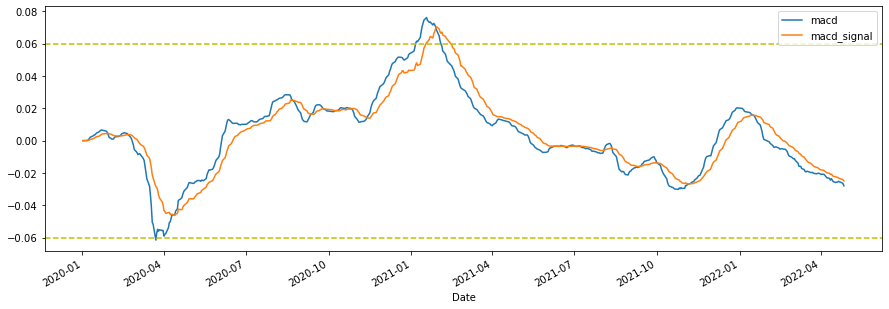

In [152]:
df_macd[['macd','macd_signal']].plot(figsize = (15,5))
plt.axhline(0.06, c='y', ls= '--')    #ls = line style
plt.axhline(-0.06, c='y', ls= '--') 

<AxesSubplot:xlabel='Date'>

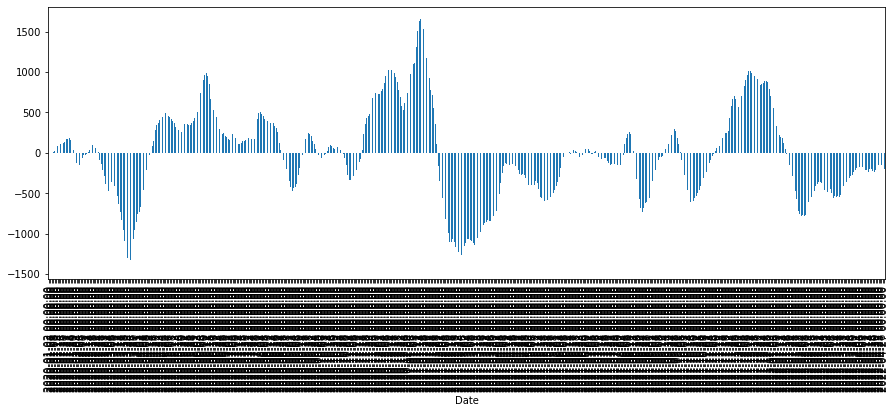

In [153]:
df['macdhist'].plot(kind='bar', figsize=(15,5))

In [160]:
df_macd

,macd,macd_signal,macdhist
Date,,,
2020-01-02,0.000000,0.000000,0.000000
2020-01-03,0.000057,0.000030,0.000027
2020-01-06,0.000075,0.000046,0.000028
2020-01-07,0.000170,0.000082,0.000088
2020-01-08,0.000534,0.000191,0.000343
...,...,...,...
2022-04-21,-0.025127,-0.022920,-0.002207
2022-04-22,-0.025446,-0.023388,-0.002058
2022-04-25,-0.026114,-0.023883,-0.002231
